## Data loading and cleaning

In [373]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [374]:
activity = pd.read_csv('./dataset//data_daily_activity.csv',index_col=None,converters={'activity_date': np.datetime64})
inapp = pd.read_csv('./dataset//data_in_app_purchases.csv',index_col=None,converters={'activity_date': np.datetime64})
virtual = pd.read_csv('./dataset//data_virtual_currency_purchases.csv',index_col=None,converters={'activity_date': np.datetime64})
match = pd.read_csv('./dataset//data_matches.csv',index_col=None,converters={'activity_date': np.datetime64})

In [375]:
activity.describe()

,user_id,activity_date
count,328952.000000,328952
mean,83527.692007,2024-11-23 10:53:34.251319552
min,69308.000000,2024-10-01 00:00:00
25%,76373.000000,2024-11-05 00:00:00
50%,83492.000000,2024-11-25 00:00:00
75%,90633.000000,2024-12-14 00:00:00
max,97537.000000,2024-12-31 00:00:00
std,8195.293352,NaN


In [376]:
activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328952 entries, 0 to 328951
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        328952 non-null  int64         
 1   platform       328952 non-null  object        
 2   activity_date  328952 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 7.5+ MB


In [377]:
activity

,user_id,platform,activity_date
0,69788,ios,2024-11-24
1,90492,Android,2024-11-24
2,90492,android,2024-11-24
3,69788,Ios,2024-11-24
4,94665,Android,2024-11-24
...,...,...,...
328947,89477,android,2024-12-15
328948,89477,Android,2024-12-15
328949,75395,Android,2024-12-15
328950,74143,android,2024-12-15


In [378]:
activity['platform']=activity['platform'].str.replace(r'(?i)ios','IOS',regex=True)
activity['platform']=activity['platform'].str.replace(r'(?a)android','Android',regex=True)
activity.head(20)

,user_id,platform,activity_date
0,69788,IOS,2024-11-24
1,90492,Android,2024-11-24
2,90492,Android,2024-11-24
3,69788,IOS,2024-11-24
4,94665,Android,2024-11-24
5,94665,Android,2024-11-24
6,73722,Android,2024-11-24
7,90371,Android,2024-11-24
8,90371,Android,2024-11-24
9,87232,IOS,2024-11-24


In [379]:
inapp

,user_id,activity_date,product_group,dollar_purchase_value,purchase_number
0,69870,2024-11-29,Promotion,4.99,4
1,95273,2024-12-08,Promotion,4.99,1
2,82825,2024-10-18,Gold,4.99,4
3,73163,2024-10-15,Gold,9.99,6
4,73163,2024-11-16,Gold,9.99,22
...,...,...,...,...,...
7031,92496,2024-12-20,Promotion,4.99,1
7032,92739,2024-12-31,Promotion,9.99,12
7033,92055,2024-11-08,Gold,4.99,1
7034,95202,2024-11-25,Gold,4.99,6


In [380]:
inapp['dollar_purchase_value'].median()

4.99

In [381]:
inapp['dollar_purchase_value']=inapp['dollar_purchase_value'].fillna(inapp['dollar_purchase_value'].median())

In [382]:
inapp.activity_date

0      2024-11-29
1      2024-12-08
2      2024-10-18
3      2024-10-15
4      2024-11-16
          ...    
7031   2024-12-20
7032   2024-12-31
7033   2024-11-08
7034   2024-11-25
7035   2024-12-16
Name: activity_date, Length: 7036, dtype: datetime64[ns]

In [383]:
virtual

,user_id,activity_date,product_group,n_purchases,gold_spend
0,76031,2024-12-05,Weapon,1,2923.0
1,88065,2024-12-05,Weapon,2,24.0
2,92892,2024-12-05,Boost,2,130.0
3,92515,2024-12-05,Boost,1,30.0
4,70286,2024-12-30,Weapon,1,3383.0
...,...,...,...,...,...
26631,79387,2024-10-18,Boost,11,39204.0
26632,96733,2024-10-18,Weapon,1,12.0
26633,85290,2024-10-18,Boost,1,81.0
26634,88775,2024-10-18,Boost,3,2039.0


In [384]:
virtual.describe()

,user_id,activity_date,n_purchases,gold_spend
count,26636.000000,26636,26636.000000,2.663600e+04
mean,83350.306991,2024-11-20 19:02:52.458327040,2.264004,6.053302e+03
min,69310.000000,2024-10-01 00:00:00,1.000000,0.000000e+00
25%,76230.000000,2024-10-31 00:00:00,1.000000,5.400000e+01
50%,83133.500000,2024-11-22 00:00:00,1.000000,1.950000e+02
75%,90236.500000,2024-12-13 00:00:00,2.000000,8.085000e+02
max,97534.000000,2024-12-31 00:00:00,83.000000,5.644800e+06
std,8131.457603,NaN,3.153429,6.063791e+04


In [385]:
virtual.isnull().sum()

user_id          0
activity_date    0
product_group    0
n_purchases      0
gold_spend       0
dtype: int64

In [386]:
virtual['activity_date']

0       2024-12-05
1       2024-12-05
2       2024-12-05
3       2024-12-05
4       2024-12-30
           ...    
26631   2024-10-18
26632   2024-10-18
26633   2024-10-18
26634   2024-10-18
26635   2024-12-09
Name: activity_date, Length: 26636, dtype: datetime64[ns]

In [387]:
match['finish_position'].isnull().sum()

797

In [388]:
match.shape[0]

1091534

In [389]:
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1091534 entries, 0 to 1091533
Data columns (total 6 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   user_id          1091534 non-null  int64         
 1   activity_date    1091534 non-null  datetime64[ns]
 2   match_type       1091534 non-null  object        
 3   finish_position  1090737 non-null  float64       
 4   bots             1091534 non-null  int64         
 5   n_matches        1091534 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 50.0+ MB


In [390]:
match['finish_position']=match['finish_position'].fillna(match['finish_position'].median())
match

,user_id,activity_date,match_type,finish_position,bots,n_matches
0,83058,2024-10-11,B,4.0,2,1
1,84488,2024-10-11,B,4.0,3,1
2,83058,2024-10-11,B,3.0,3,1
3,82134,2024-10-11,B,4.0,1,1
4,83351,2024-10-11,B,2.0,2,1
...,...,...,...,...,...,...
1091529,89485,2024-12-19,B,4.0,0,1
1091530,84224,2024-12-19,B,2.0,2,1
1091531,84224,2024-12-19,B,1.0,3,1
1091532,90549,2024-12-19,B,1.0,0,1


## EDA

### Platforms and total users trends 

In [391]:
total_users

28188

In [392]:
total_users=activity['user_id'].nunique()
no_dup_activity=activity.drop_duplicates(subset='user_id',ignore_index=True)
no_dup_activity.groupby('platform')['user_id'].count().reset_index()

,platform,user_id
0,Android,23789
1,IOS,4399


<Axes: ylabel='count'>

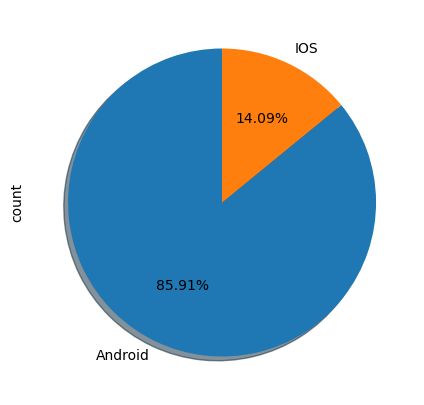

In [393]:
activity['platform'].value_counts().plot(
    kind='pie',
    autopct='%1.2f%%',         
    startangle=90,             
    shadow=True,               
    figsize=(5, 5))

<Axes: xlabel='activity_date'>

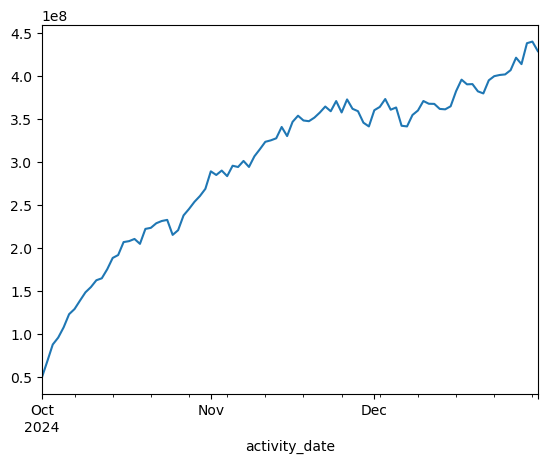

In [394]:
activity.groupby('activity_date')['user_id'].sum().plot(kind='line')

<Axes: xlabel='activity_date'>

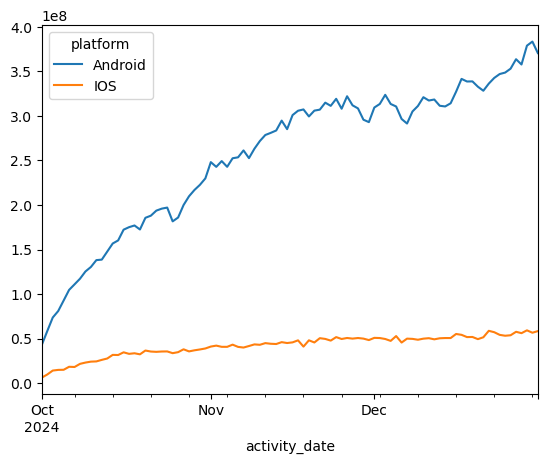

In [395]:
activity.pivot_table(values='user_id', index='activity_date', columns='platform',aggfunc='sum').plot(kind='line')

### Daily active users (DAU)

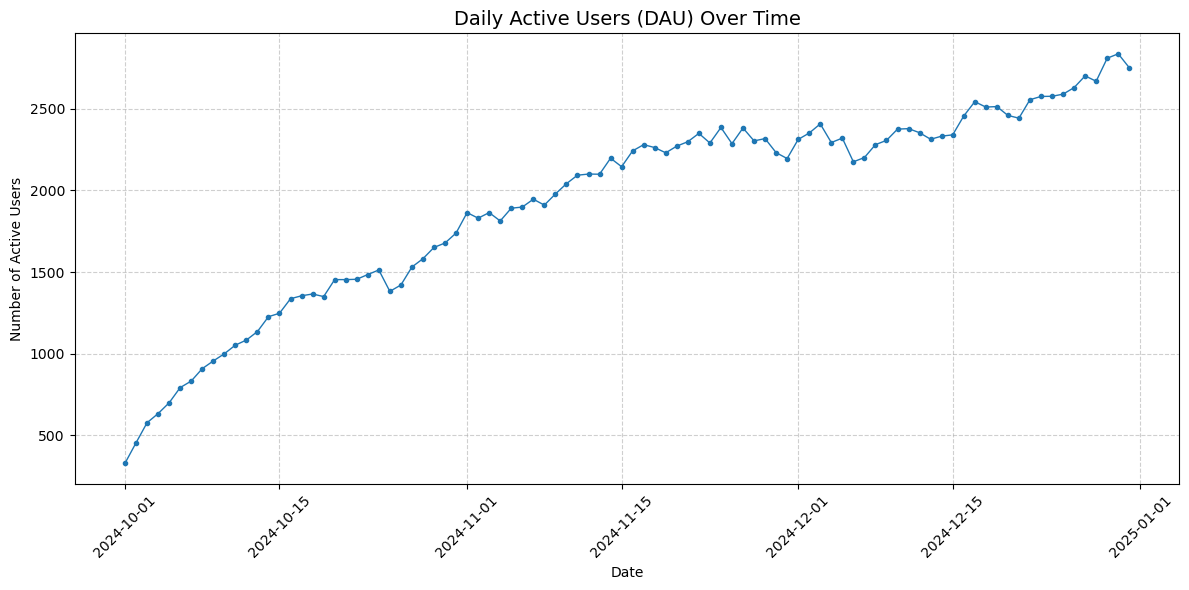

In [396]:
DAU=activity.groupby('activity_date')['user_id'].nunique().reset_index(name='DAU')
plt.figure(figsize=(12, 6))
plt.plot(DAU['activity_date'], DAU['DAU'], marker='.', linestyle='-', linewidth=1)

plt.title('Daily Active Users (DAU) Over Time', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Number of Active Users')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [397]:
DAU['month']= DAU['activity_date'].dt.strftime('%B')
DAU

,activity_date,DAU,month
0,2024-10-01,330,October
1,2024-10-02,455,October
2,2024-10-03,578,October
3,2024-10-04,634,October
4,2024-10-05,700,October
...,...,...,...
87,2024-12-27,2701,December
88,2024-12-28,2668,December
89,2024-12-29,2809,December
90,2024-12-30,2836,December


### Weekly active users (WAU)

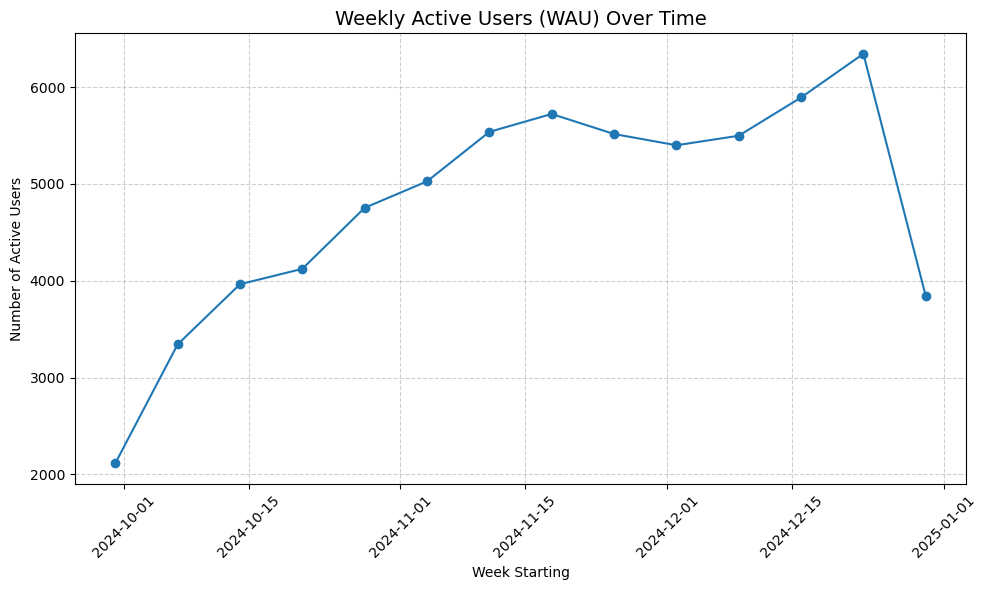

In [398]:
activity['week_start'] = activity['activity_date'] - pd.to_timedelta(activity['activity_date'].dt.weekday, unit='d')
WAU = activity.groupby('week_start')['user_id'].nunique().reset_index(name='WAU')
plt.figure(figsize=(10, 6))
plt.plot(WAU['week_start'], WAU['WAU'], marker='o')

plt.title('Weekly Active Users (WAU) Over Time', fontsize=14)
plt.xlabel('Week Starting')
plt.ylabel('Number of Active Users')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Monthly active users (MAU)

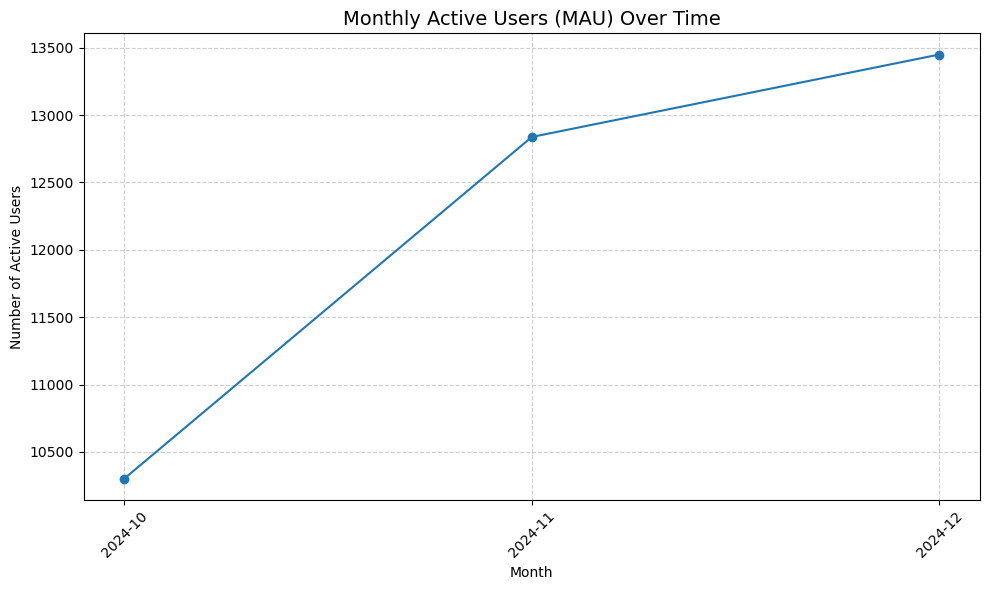

In [399]:
activity['month'] = activity['activity_date'].dt.to_period('M')
MAU = activity.groupby('month')['user_id'].nunique().reset_index(name='MAU')
MAU
plt.figure(figsize=(10, 6))
plt.plot(MAU['month'].astype(str), MAU['MAU'], marker='o')
plt.title('Monthly Active Users (MAU) Over Time', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Number of Active Users')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Weekly Stickiness 

In [400]:
avg_DAU_week

,week_start,avg_DAU
0,2024-09-30,581.666667
1,2024-10-07,995.857143
2,2024-10-14,1333.857143
3,2024-10-21,1463.142857
4,2024-10-28,1744.000000
5,2024-11-04,1925.285714
6,2024-11-11,2165.142857
7,2024-11-18,2297.857143
8,2024-11-25,2289.428571
9,2024-12-02,2289.571429


In [401]:
WAU

,week_start,WAU
0,2024-09-30,2116
1,2024-10-07,3343
2,2024-10-14,3964
3,2024-10-21,4123
4,2024-10-28,4753
5,2024-11-04,5026
6,2024-11-11,5537
7,2024-11-18,5722
8,2024-11-25,5515
9,2024-12-02,5399


In [402]:
DAU['week_start']=DAU['activity_date']- pd.to_timedelta(DAU['activity_date'].dt.weekday, unit='d')
avg_DAU_week=DAU.groupby('week_start')['DAU'].mean().reset_index(name='avg_DAU')
stickiness_week=avg_DAU_week.merge(WAU, on='week_start', how='inner')
stickiness_week['stickiness_DAU/WAU']=stickiness_week['avg_DAU']/stickiness_week['WAU']
stickiness_week


,week_start,avg_DAU,WAU,stickiness_DAU/WAU
0,2024-09-30,581.666667,2116,0.274890
1,2024-10-07,995.857143,3343,0.297893
2,2024-10-14,1333.857143,3964,0.336493
3,2024-10-21,1463.142857,4123,0.354873
4,2024-10-28,1744.000000,4753,0.366926
5,2024-11-04,1925.285714,5026,0.383065
6,2024-11-11,2165.142857,5537,0.391032
7,2024-11-18,2297.857143,5722,0.401583
8,2024-11-25,2289.428571,5515,0.415128
9,2024-12-02,2289.571429,5399,0.424073


### Monthly Stickiness 

In [403]:
avg_DAU_month = DAU.copy()
avg_DAU_month['month'] = DAU['activity_date'].dt.to_period('M')
avg_DAU_month = avg_DAU_month.groupby('month')['DAU'].mean().reset_index(name='avg_DAU')
stickiness_month = avg_DAU_month.merge(MAU, on='month', how='inner')
stickiness_month['stickiness_DAU_MAU'] = stickiness_month['avg_DAU'] / stickiness_month['MAU']
stickiness_month


,month,avg_DAU,MAU,stickiness_DAU_MAU
0,2024-10,1183.548387,10302,0.114885
1,2024-11,2133.000000,12838,0.166147
2,2024-12,2462.806452,13450,0.183108


### Cohorts and retention

In [404]:
first_activity = activity.groupby('user_id')['activity_date'].min().reset_index() 
first_activity.rename(columns=({'activity_date':'cohort_date'}),inplace=True)
first_activity

,user_id,cohort_date
0,69308,2024-11-21
1,69309,2024-11-27
2,69310,2024-11-27
3,69311,2024-12-21
4,69312,2024-11-30
...,...,...
28183,97533,2024-12-04
28184,97534,2024-12-07
28185,97535,2024-11-03
28186,97536,2024-10-01


In [405]:
activity=activity.merge(first_activity, on='user_id', how='left')
activity

,user_id,platform,activity_date,week_start,month,cohort_date
0,69788,IOS,2024-11-24,2024-11-18,2024-11,2024-10-15
1,90492,Android,2024-11-24,2024-11-18,2024-11,2024-10-14
2,90492,Android,2024-11-24,2024-11-18,2024-11,2024-10-14
3,69788,IOS,2024-11-24,2024-11-18,2024-11,2024-10-15
4,94665,Android,2024-11-24,2024-11-18,2024-11,2024-10-05
...,...,...,...,...,...,...
328947,89477,Android,2024-12-15,2024-12-09,2024-12,2024-10-26
328948,89477,Android,2024-12-15,2024-12-09,2024-12,2024-10-26
328949,75395,Android,2024-12-15,2024-12-09,2024-12,2024-11-07
328950,74143,Android,2024-12-15,2024-12-09,2024-12,2024-11-17


In [406]:
#Assume days_since_signup is the first day that a user had their first activity on the game app.
activity['days_since_signup']=(activity['activity_date']-activity['cohort_date']).dt.days
activity

,user_id,platform,activity_date,week_start,month,cohort_date,days_since_signup
0,69788,IOS,2024-11-24,2024-11-18,2024-11,2024-10-15,40
1,90492,Android,2024-11-24,2024-11-18,2024-11,2024-10-14,41
2,90492,Android,2024-11-24,2024-11-18,2024-11,2024-10-14,41
3,69788,IOS,2024-11-24,2024-11-18,2024-11,2024-10-15,40
4,94665,Android,2024-11-24,2024-11-18,2024-11,2024-10-05,50
...,...,...,...,...,...,...,...
328947,89477,Android,2024-12-15,2024-12-09,2024-12,2024-10-26,50
328948,89477,Android,2024-12-15,2024-12-09,2024-12,2024-10-26,50
328949,75395,Android,2024-12-15,2024-12-09,2024-12,2024-11-07,38
328950,74143,Android,2024-12-15,2024-12-09,2024-12,2024-11-17,28


In [407]:
cohort_size = activity[activity['days_since_signup'] == 0].groupby('cohort_date')['user_id'].nunique().reset_index(name='cohort_size')
cohort_size

,cohort_date,cohort_size
0,2024-10-01,330
1,2024-10-02,348
2,2024-10-03,372
3,2024-10-04,349
4,2024-10-05,357
...,...,...
87,2024-12-27,309
88,2024-12-28,307
89,2024-12-29,367
90,2024-12-30,358


In [408]:
retention = activity.groupby(['cohort_date', 'days_since_signup'])['user_id'].nunique().reset_index(name='active_users')
retention

,cohort_date,days_since_signup,active_users
0,2024-10-01,0,330
1,2024-10-01,1,107
2,2024-10-01,2,88
3,2024-10-01,3,81
4,2024-10-01,4,59
...,...,...,...
4273,2024-12-29,1,135
4274,2024-12-29,2,93
4275,2024-12-30,0,358
4276,2024-12-30,1,149


<Axes: xlabel='days_since_signup'>

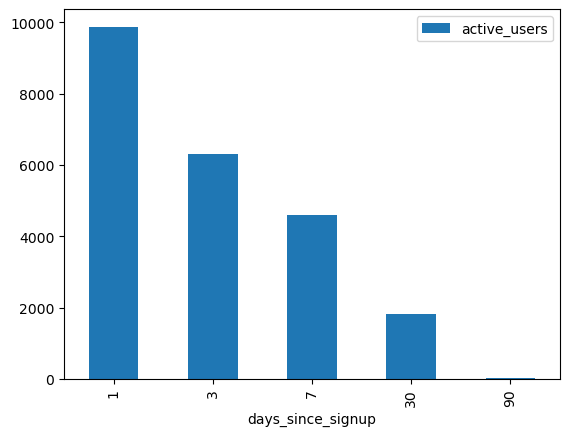

In [409]:
key_days = [1, 3, 7, 30, 90, 180] 
retention_filtered = retention[retention['days_since_signup'].isin(key_days)].sort_values(['cohort_date', 'days_since_signup'])
retention_filtered.groupby('days_since_signup')['active_users'].agg('sum').plot(kind='bar', legend = True)


In [410]:
retention_rate_calculation = retention_filtered.merge(cohort_size,on='cohort_date')
retention_rate_calculation['retention_rate']=100*(retention_rate_calculation['active_users']/retention_rate_calculation['cohort_size'])
retention_rate_calculation.median()

cohort_date          2024-11-10 00:00:00
days_since_signup                    3.0
active_users                        65.0
cohort_size                        311.0
retention_rate                 20.909091
dtype: object

In [411]:
mean_retention_rate = retention_rate_calculation.groupby('days_since_signup')['retention_rate'].agg('mean').reset_index()
mean_retention_rate

,days_since_signup,retention_rate
0,1,35.436779
1,3,23.313612
2,7,17.793729
3,30,9.198128
4,90,3.973354


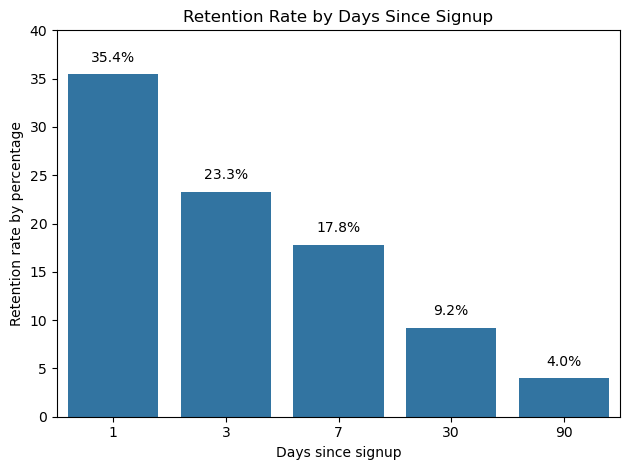

In [412]:
fig, ax = plt.subplots(1,1)
sns.barplot(data=mean_retention_rate,x='days_since_signup',y='retention_rate')
ax.set_title('Retention Rate by Days Since Signup')
ax.set_xlabel('Days since signup')
ax.set_ylabel('Retention rate by percentage')
ax.set_ylim(0,40)
for index, row in mean_retention_rate.iterrows():
    ax.text(
        index, 
        row['retention_rate'] + 1,
        f"{row['retention_rate']:.1f}%", 
        ha='center', 
        va='bottom', 
        fontsize=10
    )
plt.tight_layout()
plt.show()

### Churn 

In [421]:
churn_days = 30
last_activity = activity.groupby('user_id')['activity_date'].max().reset_index()
#last day in acitivity
end_day=activity['activity_date'].max()
#users who didn't play 
last_activity['churned']= (end_day-last_activity['activity_date']).dt.days > churn_days
last_activity

,user_id,activity_date,churned
0,69308,2024-12-30,False
1,69309,2024-12-20,False
2,69310,2024-12-05,False
3,69311,2024-12-21,False
4,69312,2024-12-29,False
...,...,...,...
28183,97533,2024-12-04,False
28184,97534,2024-12-31,False
28185,97535,2024-11-08,True
28186,97536,2024-12-26,False


In [425]:
churn_rate = last_activity['churned'].mean()
print(f'Churn rate is {churn_rate:.2f}%')

Churn rate is 0.52%


In [430]:
activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328952 entries, 0 to 328951
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   user_id            328952 non-null  int64         
 1   platform           328952 non-null  object        
 2   activity_date      328952 non-null  datetime64[ns]
 3   week_start         328952 non-null  datetime64[ns]
 4   month              328952 non-null  period[M]     
 5   cohort_date        328952 non-null  datetime64[ns]
 6   days_since_signup  328952 non-null  int64         
dtypes: datetime64[ns](3), int64(2), object(1), period[M](1)
memory usage: 17.6+ MB


## Others 

In [438]:
match.columns.tolist()

['user_id',
 'activity_date',
 'match_type',
 'finish_position',
 'bots',
 'n_matches']

In [ ]:
#how many users by match types / the number of matched by match types
#finish positions by match types --> which is most difficult, is it relevant to the number of bots, find the connection, maybe more bots is more difficult?


In [433]:
inapp
#revenue? 


,user_id,activity_date,product_group,dollar_purchase_value,purchase_number
0,69870,2024-11-29,Promotion,4.99,4
1,95273,2024-12-08,Promotion,4.99,1
2,82825,2024-10-18,Gold,4.99,4
3,73163,2024-10-15,Gold,9.99,6
4,73163,2024-11-16,Gold,9.99,22
...,...,...,...,...,...
7031,92496,2024-12-20,Promotion,4.99,1
7032,92739,2024-12-31,Promotion,9.99,12
7033,92055,2024-11-08,Gold,4.99,1
7034,95202,2024-11-25,Gold,4.99,6
